In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

In [114]:
def plot_traveling_salesman(p1, p2, ax=None, **plt_kwargs):
    
    if ax is None:
        ax = plt.gca()
    
    x_values = [p1[0], p2[0]] 
    y_values = [p1[1], p2[1]]
    
    ax.plot(x_values,y_values, color='#005a8d')
    
    return ax

def check_tsp(paths, ia, ib, x, y):
    
    fig, ax = plt.subplots(1, 2, figsize=(12,6))
    
    # Draw a circle on each plot
    circle = plt.Circle((0, 0), 10) 
    circle.set_fill(False)
    ax[0].add_patch(circle)
    circle = plt.Circle((0, 0), 10) 
    circle.set_fill(False)
    ax[1].add_patch(circle)
    
    # And place the cities
    ax[0].scatter(x,y)
    ax[1].scatter(x,y)
    
    # Grid and limits
    ax[0].grid(True)
    ax[0].set_xlim([-15,15])
    ax[0].set_ylim([-15,15])
    ax[1].grid(True)
    ax[1].set_xlim([-15,15])
    ax[1].set_ylim([-15,15])

    N = np.size(paths[ipath])
    for i in range(N):
        if (i==N-1):
            a = int(paths[ia, i])
            b = int(paths[ia, 0])
        else:
            a = int(paths[ia, i])
            b = int(paths[ia, i+1])
        p1 = [x[a], y[a]]
        p2 = [x[b], y[b]]

        plot_traveling_salesman(p1, p2, ax[0])
        
    for i in range(N):
        if (i==N-1):
            a = int(paths[ib, i])
            b = int(paths[ib, 0])
        else:
            a = int(paths[ib, i])
            b = int(paths[ib, i+1])
        p1 = [x[a], y[a]]
        p2 = [x[b], y[b]]
        
        plot_traveling_salesman(p1, p2, ax[1])

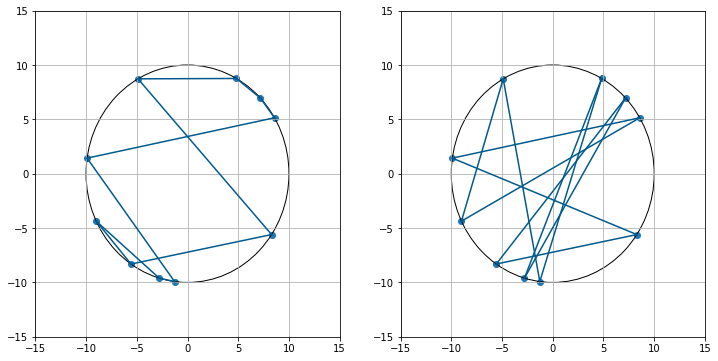

In [137]:
# data
datafile = "./data/9/randomsearch/cities_10.dat"
x, y = np.loadtxt(datafile, usecols=(0, 1), unpack=True)

datafile = "./data/9/randomsearch/sorted_10.dat"
paths = np.loadtxt(datafile)

best = 0
worst = np.size(paths[:,0])-1
check_tsp(paths, best, worst, x, y)

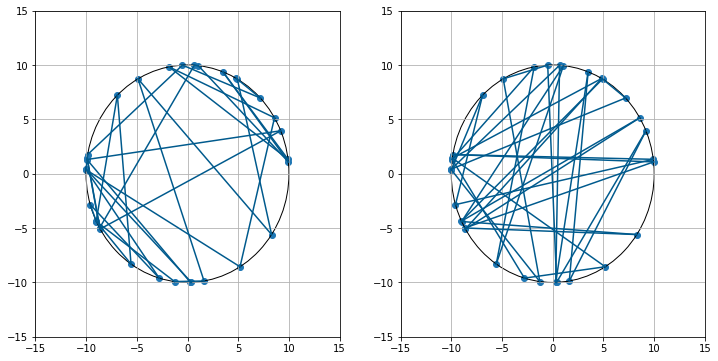

In [138]:
# data
datafile = "./data/9/randomsearch/cities_32.dat"
x, y = np.loadtxt(datafile, usecols=(0, 1), unpack=True)

datafile = "./data/9/randomsearch/sorted_32.dat"
paths = np.loadtxt(datafile)

best = 0
worst = np.size(paths[:,0])-1
check_tsp(paths, best, worst, x, y)